In [407]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [408]:
file_path = r"data/recommend.csv"

df = pd.read_csv(file_path)



In [409]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [410]:
#Dropping columns to further apply the machine learning algo to this test data set , like the previous one we've used 
df_clean = df.drop(['Unnamed: 0','artist_name','lyrics', 'track_name', 'genre', 'topic', 'like/girls', 'release_date'], axis=1)

df_clean


,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143


# K means with Scaling 

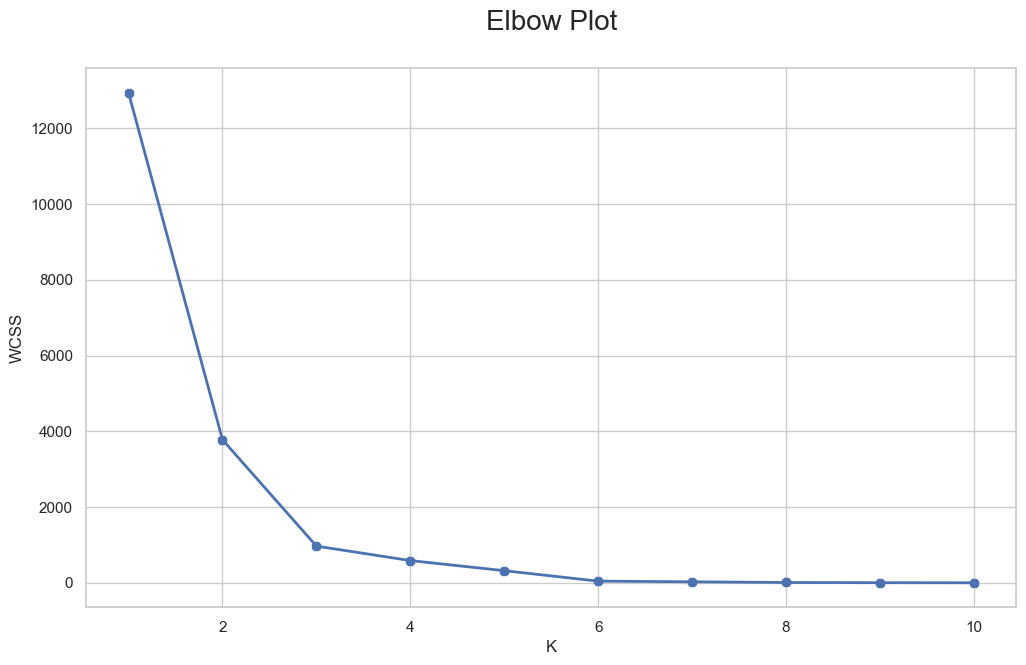

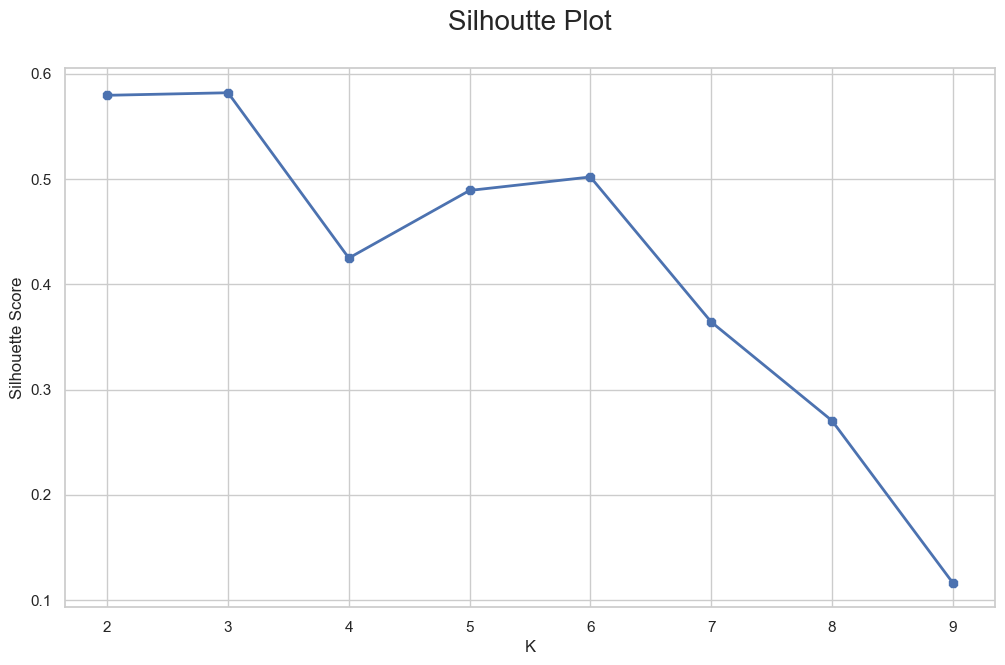

In [411]:
#lets scale our new data and follow the steps we have just like our original model ,, we will be scaling our data
from sklearn import metrics


X1 = df_clean



#lets scale what we have 
scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)
wcss_scaled = []

for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init="k-means++")
    kmeans.fit(X1)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize= (12,7))

sns.set(style="whitegrid")
plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()


# Now lets create a plot of silhoutte score 
sil_scaled = []
for k in range(2, 10):
# create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1)
    sil_scaled.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 10), sil_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()





# K = 3  

In [412]:
kmeans_scaled = KMeans(n_clusters =3, init = "k-means++" , n_init= 50, random_state= 42)

labels = kmeans_scaled.fit_predict(X1_scaled)

labels

array([2, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [413]:
kmeans_scaled.cluster_centers_

array([[ 0.25937828, -0.41460243,  0.13530876, -0.13693189,  0.20290709,
        -0.38491977,  0.20745576,  0.16464024,  0.01169093,  0.14184382,
        -0.37086123, -0.33174425,  0.17578886,  0.17727258, -0.45751525,
         0.19098027, -0.15116348],
       [-1.00375024,  1.6601728 , -0.81794805, -0.78272935, -0.24807413,
        -0.13222376, -0.47251275, -0.38173663,  0.40916123, -0.32814006,
        -0.19582789,  1.53942192, -0.40604327, -0.39682002,  1.89792005,
        -0.53992141,  0.95894335],
       [ 0.19185254, -0.41812858,  0.68873479,  2.52398195, -0.92420138,
         2.9588859 , -0.50716481, -0.38900845, -0.90015899, -0.33662664,
         2.98768436, -0.75663413, -0.41843547, -0.44726805, -0.59323338,
        -0.25701906, -0.85974231]])

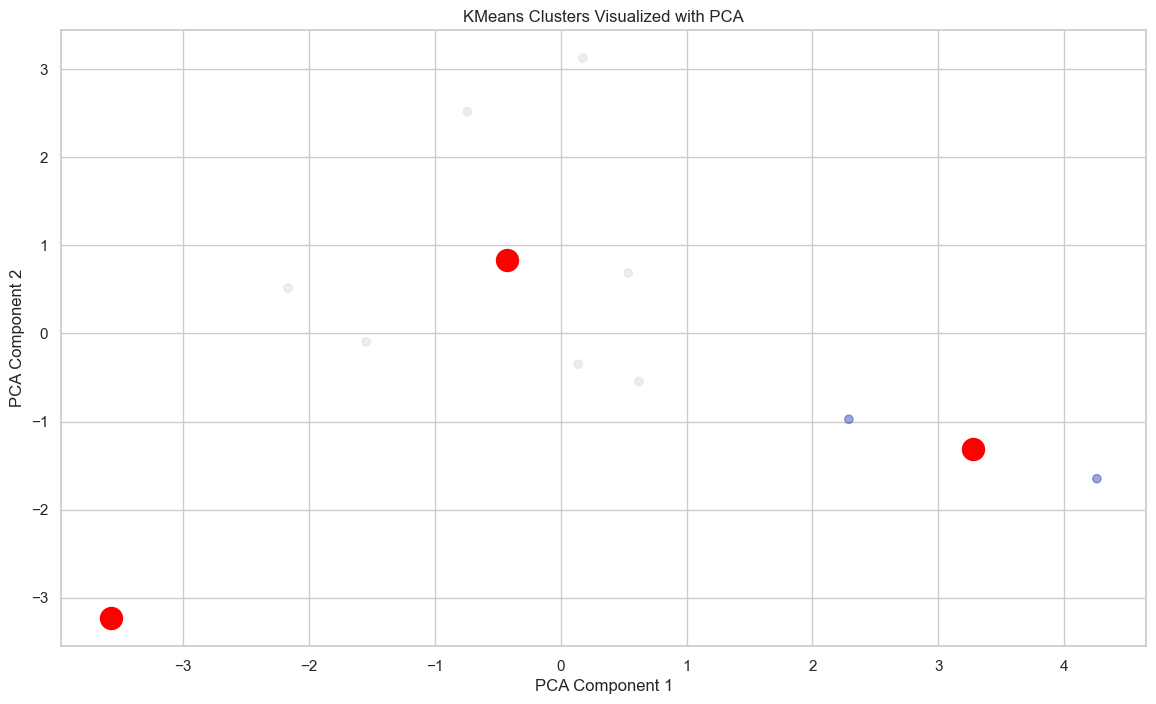

In [414]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "coolwarm", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [415]:

# save cluster assignments to new column in rec_df
df_clean['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [416]:
#In the dataset you will now see each track , and the cluster they are grouped too
df_clean.head(10)

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,1
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,2
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,2
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,0
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,2
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,1
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,1
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,2
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,2
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,1


In [421]:
label = df[['genre', 'artist_name','track_name']]

label = pd.concat([label, df_clean], axis=1)

In [418]:
#Now Showing each cluster ...
label[df_clean['Cluster']==0]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3,pop,jerry lee lewis,your cheating heart,25,0.20474,0.002506,0.002506,0.129818,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,0


In [419]:
label[df_clean['Cluster']==1]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,rock,godsmack,immune,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,...,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,1
5,jazz,noro morales,silencio,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,...,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,1
6,rock,rage against the machine,pistol grip pump,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,1
9,pop,paramore,playing god,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,1


In [420]:
label[df_clean['Cluster']==2]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,reggae,dennis brown,second chance,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,2
2,pop,the black crowes,sister luck,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,...,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,2
4,pop,paul anka,eso beso,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,...,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,2
7,blues,taste,railway and gun,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,...,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,2
8,country,randy travis,messin' with my mind,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,2
